In [1]:
%matplotlib notebook

In [2]:
import numpy as np
from ztfquery import query
from astropy import time

In [3]:
zquery = query.ZTFQuery()

In [4]:
# Step 1, load the meta data
zquery.load_metadata(sql_query="ccdid=15 and qid=1 and seeing<3 and obsjd>%d"%time.Time("2018-06-02").jd)

<IPython.core.display.Javascript object>


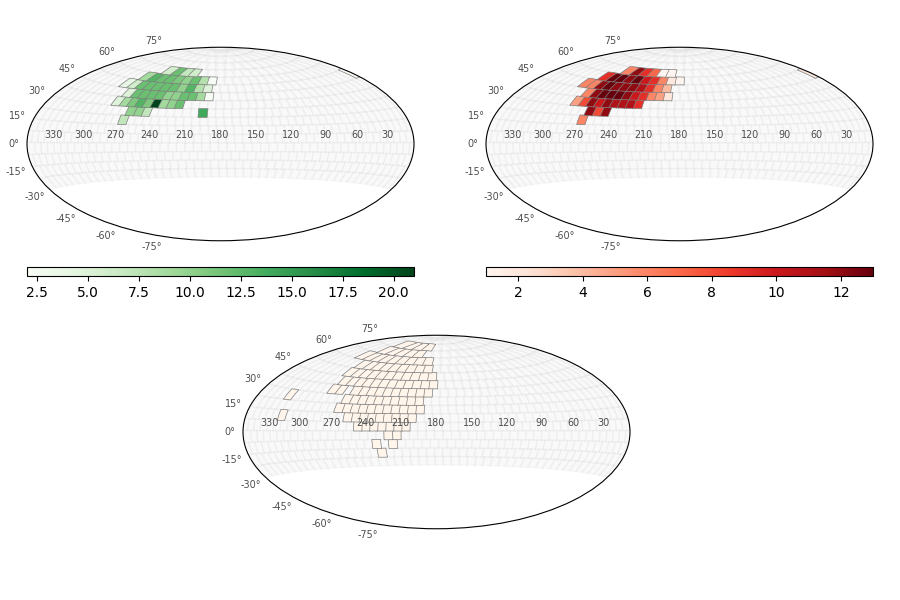

In [5]:
fig = zquery.show_gri_fields()

<IPython.core.display.Javascript object>


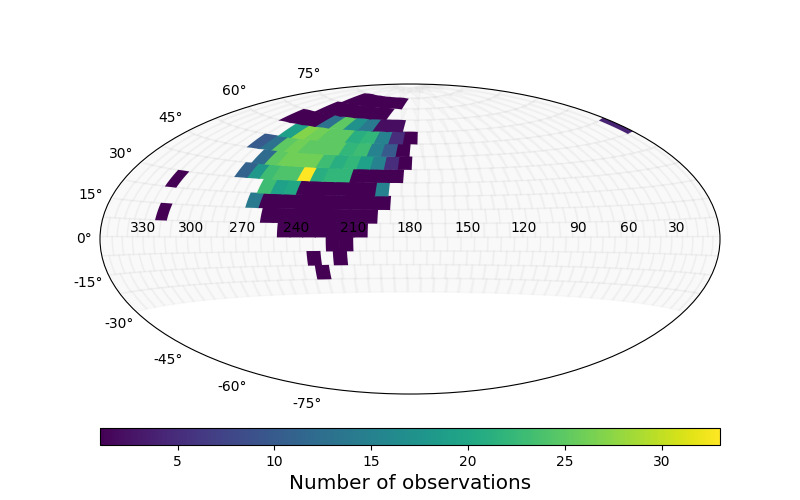

In [18]:
field_density_without_zeros = {f:v for f,v in zquery.get_field_obsdensity(grid="main", fid=[1,2,3]).items() if v>0}
zquery.show_fields(field_density_without_zeros, clabel="Number of observations")

# Average `value` using a field

`value` could be anything within the data DataFrame (metatable or data depending on your object see `_data`)

### Case of Airmass

<IPython.core.display.Javascript object>


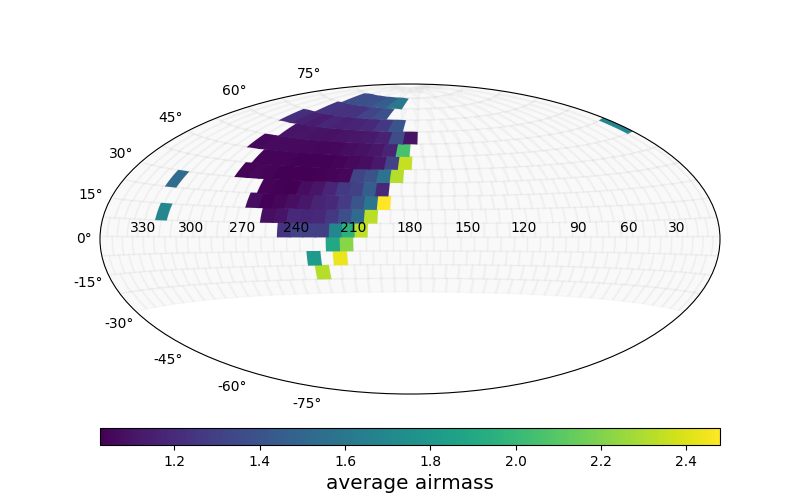

In [20]:
field_airmass = zquery.get_field_average_value("airmass", grid="main")

zquery.show_fields(field_airmass, clabel="average airmass")

In [24]:
### Case of RA

In [ ]:
field_airmass = zquery.get_field_average_value("ra", grid="main")

zquery.show_fields(field_airmass, clabel="average ra")

# Any Dictionary you want

<IPython.core.display.Javascript object>


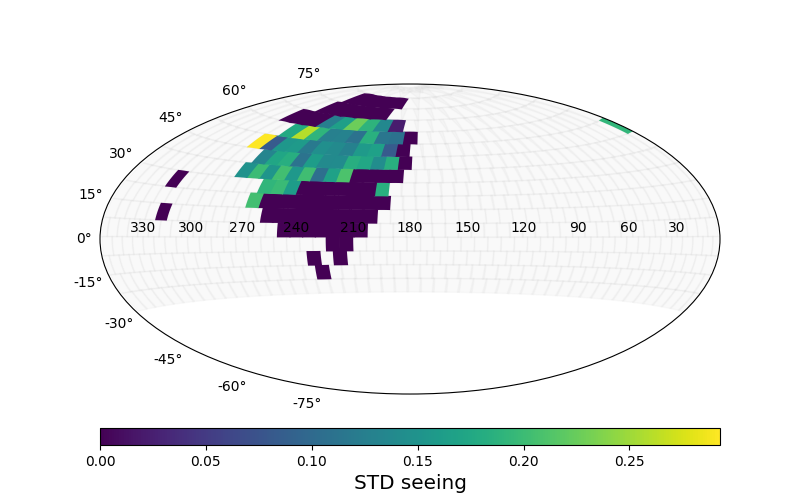

In [23]:
field_std_seeing = {f_: np.nanstd(zquery._data[np.in1d(zquery._data["field"], f_)]["seeing"])
                    for f_ in zquery.get_observed_fields(grid="main")}

zquery.show_fields(field_std_seeing, clabel="STD seeing")